## UnshearView Op

In [1]:
//load ImageJ
%classpath config resolver imagej.public https://maven.imagej.net/content/groups/public
%classpath add mvn net.imagej imagej 2.0.0-rc-67

//create ImageJ object
ij = new net.imagej.ImageJ()

Added new repo: imagej.public


net.imagej.ImageJ@50987afc

This `Op` wraps the `Views.unshear()` method of ImgLib2, un[shearing](https://en.wikipedia.org/wiki/Shear_mapping) a `RandomAccessible` in a given dimension (using a second dimension as reference). This `Op` is the opposite of [`shearView`](shearView.ipynb), and can be used to undo a shear. Let's take a look at how it is called:

In [2]:
ij.op().help('unshearView')

Available operations:
	(TransformView out) =
	net.imagej.ops.transform.unshearView.DefaultUnshearView(
		RandomAccessible in,
		int shearDimension,
		int referenceDimension)
	(IntervalView out) =
	net.imagej.ops.transform.unshearView.UnshearViewInterval(
		RandomAccessible in,
		Interval interval,
		int shearDimension,
		int referenceDimension)

Let's take a closer look at each parameter:
* `RandomAccessible in`: the input image
* `Interval interval`: an **optional** parameter that defines a region on the `RandomAccessible` that we want to shear, and allows the `Op` to return an minimal `Interval` containing all of the pixels on the original `Interval`, although of course not the same size as before. If you originally are starting with a `RandomAccessibleInterval`, it is probably best to include this interval. We are going to use it in the notebooks, since displaying a `RandomAccessible` not on an `Interval` is harder.
* `int shearDimension`: the dimension whose coordinates will change based on `referencedimension`.
* `int referenceDimension`: the dimension whose coordinates will not change but will influence `shearDimension`.

So, let's say that `shearDimension` is `0` and `referenceDimension` is `1`. This will cause `(x, y)` to become `(x - y, x)`. Let's see what this looks like visually with an image:

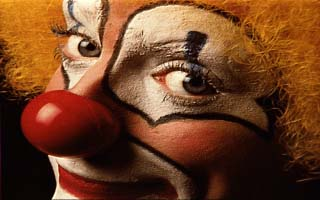

In [3]:
input = ij.scifio().datasetIO().open("http://imagej.net/images/clown.png")

ij.notebook().display(input)

Let's start by shearing this image:

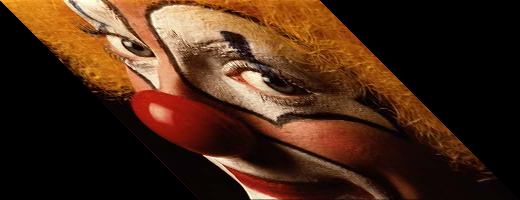

In [4]:
import net.imglib2.FinalInterval
import net.imglib2.view.Views

shearDimension = 0
referenceDimension = 1

//Maybe we want all of the pixels outside the original interval to have a value of zero
extended = ij.op().run("extendZeroView", input)
sheared = ij.op().run("shearView", extended, shearDimension, referenceDimension)

//since (x,y) => (x + y, y), our size will be (width + height, height, numChannels) (and the min is (0, 0, 0))
outputInterval = FinalInterval.createMinSize(0, 0, 0, input.dimension(0) + input.dimension(1), input.dimension(1), 3)
outputIntervaled = Views.interval(sheared, outputInterval)

ij.notebook().display(outputIntervaled)

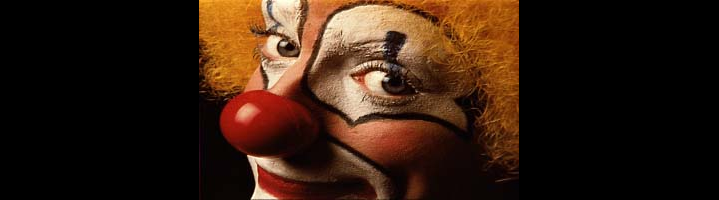

In [8]:
//SECOND OPTION

//let the Op do all the work that we did above
sheared = ij.op().run("unshearView", outputIntervaled, outputIntervaled, shearDimension, referenceDimension)

ij.notebook().display(sheared)

Note that the second option decided that we wanted to extend our `Interval` using [`extendPeriodicView`](extendPeriodicView.ipynb), however if for some reason this would not be desired, then the first option, although more code, is preferable.